In [107]:
import pandas as pd
import numpy as np
import sklearn as skt
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

In [66]:
train = pd.read_csv("C:\\Desktop\\Vamsi\\train_sample.csv")

In [67]:
train.head(50)

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0
5,93663,3,1,17,115,2017-11-09 01:22:13,NaN,0
6,17059,1,1,17,135,2017-11-09 01:17:58,NaN,0
7,121505,9,1,25,442,2017-11-07 10:01:53,NaN,0
8,192967,2,2,22,364,2017-11-08 09:35:17,NaN,0
9,143636,3,1,19,135,2017-11-08 12:35:26,NaN,0


In [68]:
train.loc[train['attributed_time'].isnull(),train.columns[1]].count()

99773

In [69]:
def missingValues(data):
    for col in data.columns:
        if(data.loc[data[col].isnull(),data.columns[1]].count() > 0.5*len(data)):
            data.drop(col,axis=1,inplace=True)
        elif(str(data[col].dtype)!="object" and str(data[col].dtype)!="category"):
            data[col] = data[col].fillna(data[col].mean())            
    return data

In [70]:
dat =missingValues(train)

In [71]:
dat.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ip,100000.0,91255.87967,69835.553661,9.0,40552.0,79827.0,118252.0,364757.0
app,100000.0,12.04788,14.941500,1.0,3.0,12.0,15.0,551.0
device,100000.0,21.77125,259.667767,0.0,1.0,1.0,1.0,3867.0
os,100000.0,22.81828,55.943136,0.0,13.0,18.0,19.0,866.0
channel,100000.0,268.83246,129.724248,3.0,145.0,258.0,379.0,498.0
is_attributed,100000.0,0.00227,0.047591,0.0,0.0,0.0,0.0,1.0


In [72]:
dat.click_time = pd.to_datetime(dat.click_time)
#dat['year'] = dat.click_time.dt.strftime('%Y')
#dat['month'] = dat.click_time.dt.strftime('%m')
dat['date'] = dat.click_time.dt.strftime('%d')
dat['hour'] = dat.click_time.dt.strftime('%H')
#dat['min'] = dat.click_time.dt.strftime('%M')
#dat['sec'] = dat.click_time.dt.strftime('%S')
dat["hour"] = pd.to_numeric(dat.hour)
dat["date"] = pd.to_numeric(dat.date)
dat.drop('click_time',axis=1,inplace=True)
dat['is_attributed'] = dat.is_attributed.astype('category')

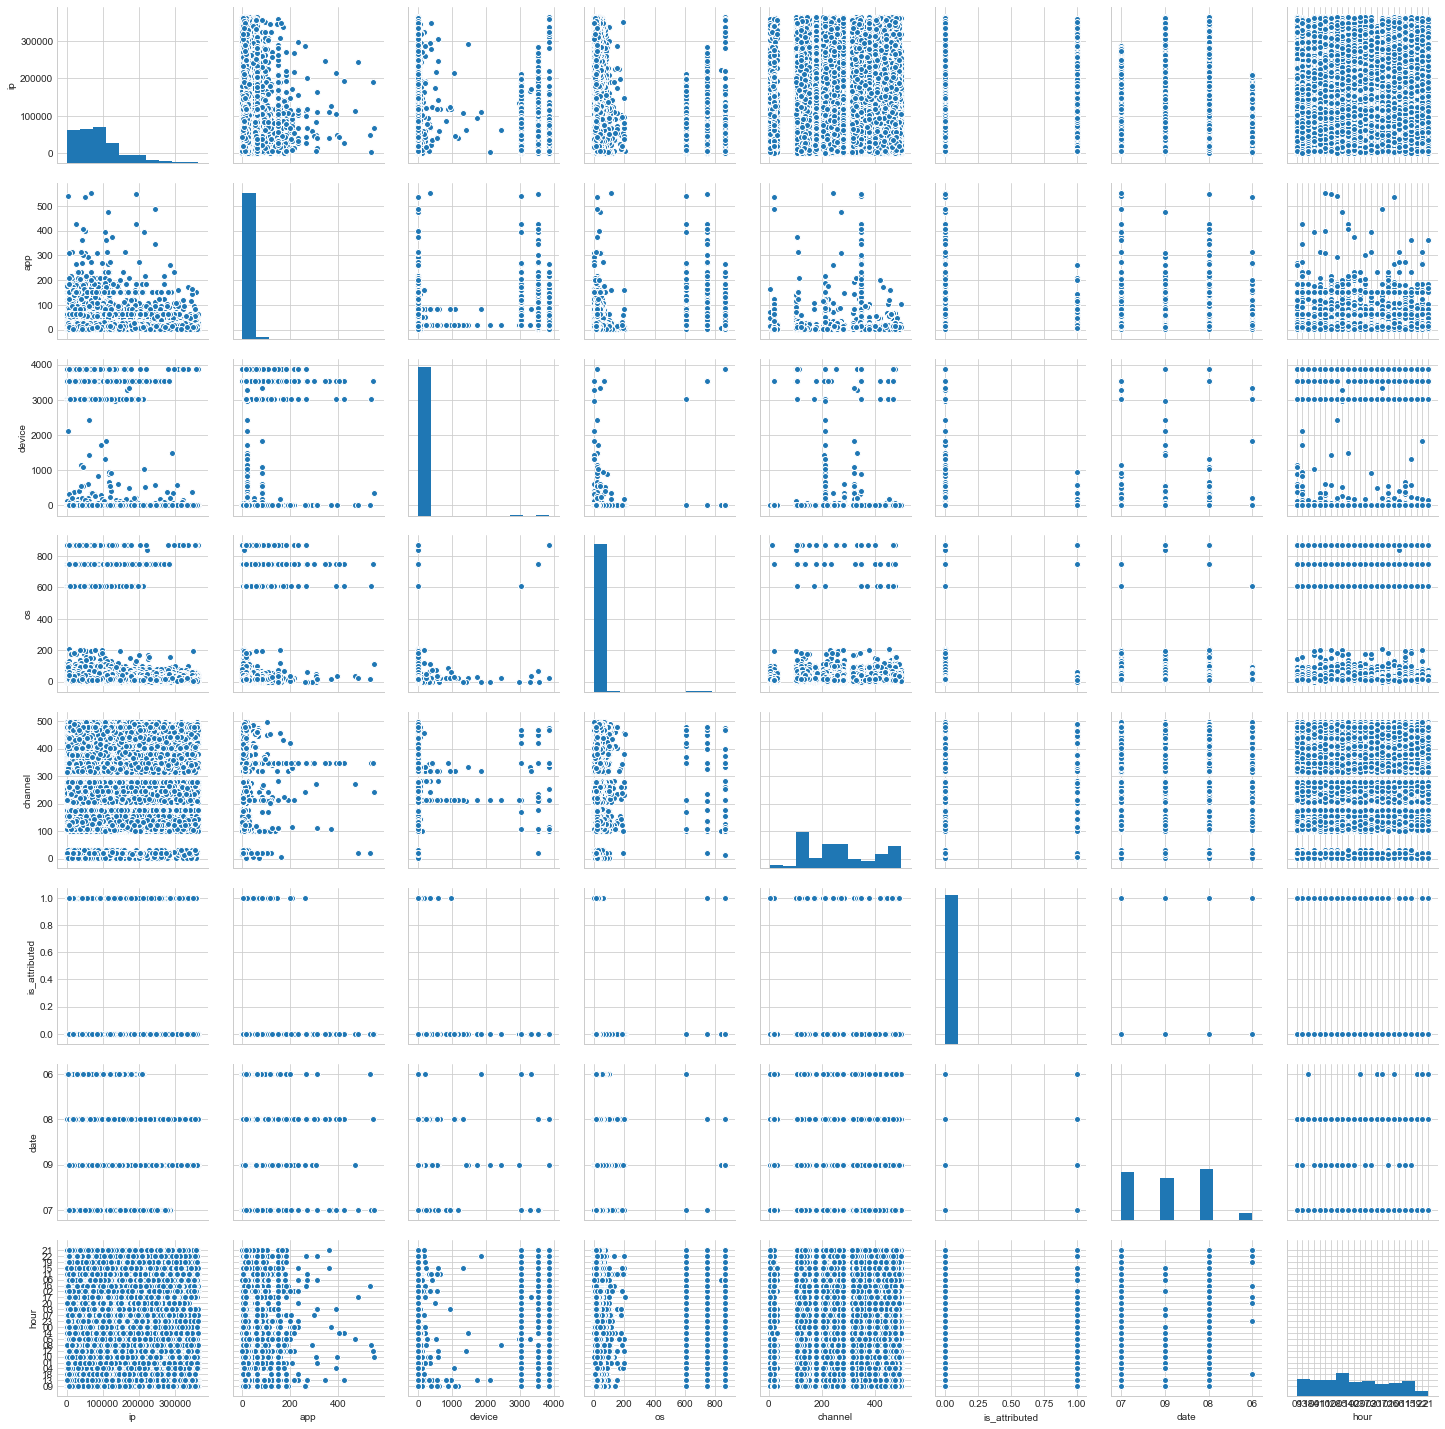

In [20]:
sb.set_style("whitegrid")
sb.pairplot(dat)

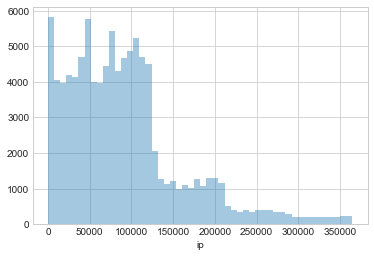

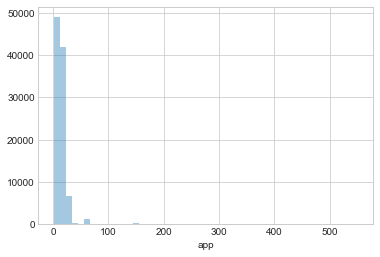

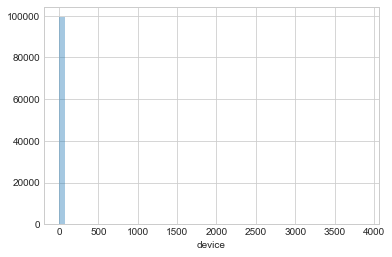

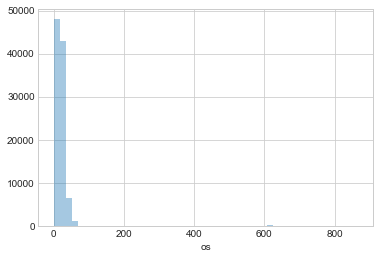

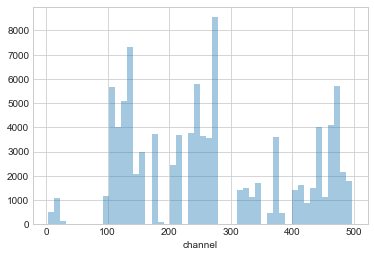

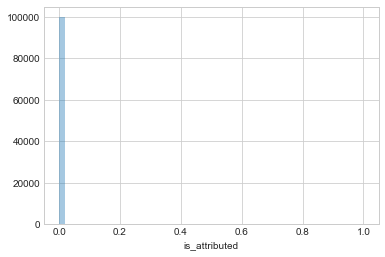

In [71]:
for col in dat.columns:
    if dat[col].dtype == "int64":
        plt.show(sb.distplot(dat[col],kde=False))

In [73]:
#dat.app.value_counts()[:20].plot(kind="barh")
dat.corr()

,ip,app,device,os,channel,date,hour
ip,1.000000,0.010400,-0.001499,-0.000470,0.007563,0.057067,-0.007955
app,0.010400,1.000000,0.248376,0.247160,-0.028238,-0.032182,0.026079
device,-0.001499,0.248376,1.000000,0.924456,-0.035398,-0.040110,0.012035
os,-0.000470,0.247160,0.924456,1.000000,-0.033175,-0.031336,0.014660
channel,0.007563,-0.028238,-0.035398,-0.033175,1.000000,0.000265,-0.021326
date,0.057067,-0.032182,-0.040110,-0.031336,0.000265,1.000000,-0.274896
hour,-0.007955,0.026079,0.012035,0.014660,-0.021326,-0.274896,1.000000


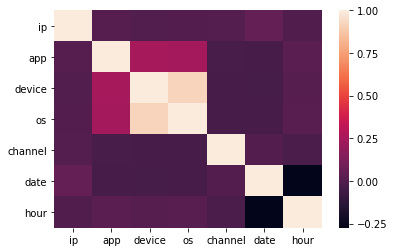

In [74]:
sb.heatmap(dat.corr(),xticklabels=dat.corr().columns.values,yticklabels=dat.corr().columns.values)

In [75]:
X_train,X_test,Y_train,Y_test = train_test_split(dat,dat['is_attributed'],test_size=0.2)

In [109]:
#lr = LinearRegression(normalize=True)
#lr.fit(X_train,Y_train)
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [114]:
y_pred =rf.predict(X_test)
mean_squared_error(y_pred,Y_test)

y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [113]:
pd.Series(y_pred.round()).value_counts()
Y_test.value_counts()
#Y_test.value_counts()
#pd.crosstab(pd.Series(y_pred.round()),Y_test,margins=True)

0    19952
1       48
Name: is_attributed, dtype: int64